# <center>Sklearn之聚类分析</center>

# 1 聚类分析介绍 

[机器学习sklearn19.0聚类算法——Kmeans算法](https://blog.csdn.net/loveliuzz/article/details/78783773)

## 1.1 什么是聚类

聚类就是对大量未知标注的数据集，按照**数据内部的数据特征**将数据集划分为**多个不同的类别**，使**类别内的数据比较相似，而类别之间数据有很大的相异性**，其属于**无监督学习**。

## 1.2 聚类的思想

给定一个有M个对象的数据集，构建一个具有**K个簇**的模型，其中K<=M，同时满足以下条件：
- **每个簇至少包含一个对象**。
- **每个对象属于且仅属于一个簇**。
- **将满足上述条件的K个簇称为一个合理的聚类划分**。

基本思想：对于**给定的类别数目K**，首先给定**初始划分**，通过**迭代改变样本和簇的隶属关系**，使得**每次处理后得到的划分方式比上一次的好（总的数据集之间的距离和变小了）**。

## 1.3 K-means聚类算法

### 1.3.1 K-means算法的过程

K-means算法，也称**K-平均算法**或**K-均值算法**，是一种使用广泛的**最基础的聚类算法**，一般作为掌握聚类算法的第一个算法。

K-means算法的过程：
- 选择初始化的k个类别（簇）中心（质心）。
- 计算每个样本到k个类别中心的距离，并将其标记为距离最近的类别。
- 以每个类别中样本的均值，更新该类别的中心。
- 重复上述两步操作，直到达到某个终止条件。

终止条件：
- 迭代次数、最小平方误差MSE、簇中心点变化率。

### 1.3.2 K-means算法的优缺点

- **缺点：**
    - **K值是用户给定的**，在进行数据处理前，K值是未知的，不同的K值得到的结果也不一样。
    - 对**初始簇中心是敏感的**。
    - 不适合发现**非凸形状的簇**或**大小差别较大的簇**。
    - **特殊值（离群值）**对模型的影响比较大。
- **优点：**
    - 容易理解，聚类效果不错。
    - 处理**大数据集**的时候，该算法可证较好的**伸缩性**和**高效率**。
    - 当**簇近似高斯分布**时，效果非常不错。

### 1.3.3 Sklearn中K-means算法参数

sklearn.cluster.KMeans类是该算法的具体实现。
- **主要参数：**
    - **n_clusters：**即K值，一般需要**多试一些值以获得较好的聚类效果**（[肘方法和交叉验证来确定K值](https://blog.csdn.net/haizhiguang/article/details/82595560)）。
    - **init：** 初始质心的选择方式，可以为**完全随机选择random**、**优化过的K-means++**或者自己指定初始化的K个质心。一般建议使用默认的K-means++。
    - **n_init：**用**不同的初始化质心（init进行初始化）运行算法的此处**，由于**K-means是结果受初始质心影响的局部最优迭代算法**。因此，需要多运行几次以选择一个较好的聚类效果，默认值是10，一般不需要改。如果K值较大，则可适当增大这个值。
    - **max_iter：**最大迭代次数，一般如果是**凸数据可以不用管这个值**，如果**数据不是凸的，可能很难收敛，此时可以指定最大迭代次数让算法可以及时退出循环**。
    - **algorithm：**有**auto**、**full**和**elkan**三种选择。**full就是传统的K-means算法**，**elkan是elkan K-means算法**。默认是**auto**，则会根据**数据是否稀疏，来决定如何选择full和elkan**。一般数据是稠密的，那么就是**elkan**，否则就是**full**。一般建议直接使用默认的**auto**。
- **主要属性：**
    - **cluster_centers_**：每个簇质心的坐标。
    - **labels_：** 簇标签。
    - **inertia_：** 每个点到其簇质心的距离之和。

### 1.3.4 Sklearn中聚类数据生成器

sklearn.datasets.make_blobs()函数常用来**生成聚类算法的测试数据**。直观的说，该函数会根据指定的**特征数量**、**质心数量**、**范围**等来生成几类数据，这些数据可以用于测试聚类算法的效果。

- **参数说明：**
    - **n_samples：**待生成样本的总数。
    - **n_features：**每个样本的特征数。
    - **centers：**簇的数量。
    - **cluster_std：**簇的方差，例如希望生成两类数据，其中一类比另一类具有更大的方差，可以将cluster_std设置为$[1.0, 3.0]$。
- **返回值说明：**
    - **X：**生成的样本数据集。
    - **y：**样本数据集的标签。

# 2 数据处理

## 2.1 数据处理和可视化准备

In [26]:
import time
import warnings
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, MiniBatchKMeans
from collections import Counter

# 消除AMI的FutureWarning
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

## 2.2 make_blobs函数示例

用make_blobs()函数生成三类数据用于聚类（100个样本，每个样本2个特征：

In [2]:
data, target = make_blobs(n_samples=100, n_features=2, centers=3)

画出该样本并标记不同颜色：

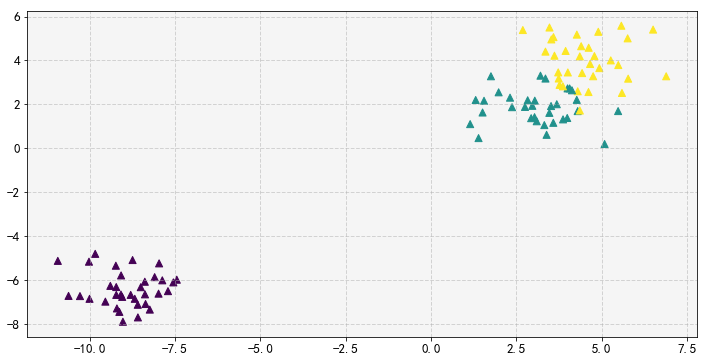

In [3]:
# 使用matplotlib作图
plt.figure(figsize=(12, 6))
plt.gca().set_facecolor('whitesmoke')
plt.scatter(data[:, 0], data[:, 1], s=50, c=target, marker='^')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(linestyle='--', linewidth=1, alpha=0.5)
plt.show()

# 3 K-means算法

## 3.1 数据分布对K-means聚类的影响

### 3.1.1 产生模拟数据

In [4]:
# 样本数量
N = 1500
# 簇的数量
centers = 4
# 生成聚类数据
data, y = make_blobs(n_samples=N, n_features=2, centers=centers, random_state=28)
data1, y1 = make_blobs(n_samples=N, n_features=2, centers=centers, cluster_std=[1.0, 1.5, 2.0, 2.5],random_state=28)
data2 = np.vstack((data[y==0][:200], data[y==1][:100], data[y==2][:10], data[y==3][:50]))
y2 = np.array([0]*200 + [1]*100 + [2]*10 + [3]*50)

观察data样本数据所属簇的构成：

In [5]:
# 使用Counter函数统计每个簇中样本的数量
Counter(y)

Counter({0: 375, 1: 375, 2: 375, 3: 375})

发现1500个样本，被四个簇均分。data2样本数据的构成为：
- 0簇前200个样本
- 1簇前100个样本
- 2簇前10个样本
- 3簇前50个样本

而其标签数据则用numpy数组手动生成。

### 3.1.2 构建模型

In [6]:
# 初始化模型对象
km = KMeans(n_clusters=centers, init='k-means++', n_init=10, random_state=28)
# 训练模型
km.fit(data, y)
#  使用模型进行自身预测
y_pre = km.predict(data)
print('所有样本距离簇质心的总距离：', km.inertia_)
print('所有样本距离族质心的平均距离：', (km.inertia_/N))
print('簇质心坐标：', km.cluster_centers_)
# 训练并预测data1
y_pre1 = km.fit_predict(data1)
# 训练并预测data2
y_pre2 = km.fit_predict(data2)

所有样本距离簇质心的总距离： 2592.9990199
所有样本距离族质心的平均距离： 1.72866601327
簇质心坐标： [[ -7.44342199e+00  -2.00152176e+00]
 [  5.80338598e+00   2.75272962e-03]
 [ -6.36176159e+00   6.94997331e+00]
 [  4.34372837e+00   1.33977807e+00]]


### 3.1.3 数据分布对K-means聚类的影响

**封装一个拓展边界函数：**

In [7]:
# 拓展边界函数
def expend_border(a, b):
    d = (b-a) * 0.1
    return a-d, b+d

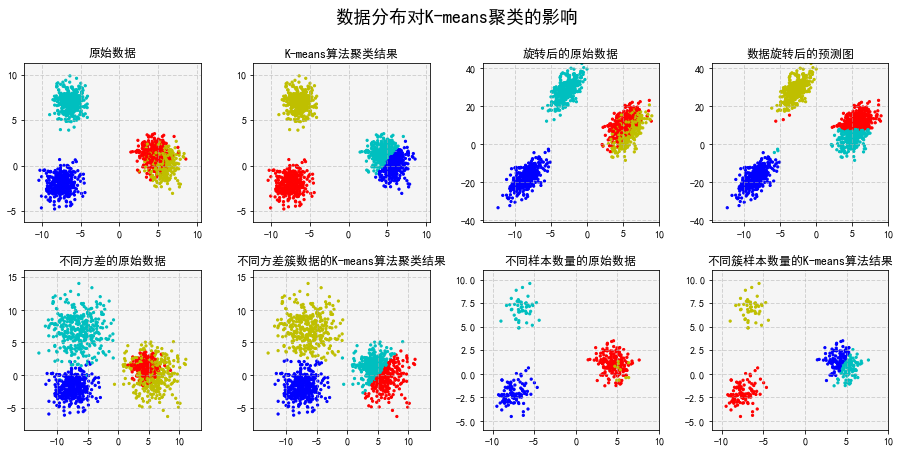

In [8]:
# 设置画布
plt.figure(figsize=(12, 6))
plt.subplots_adjust(left=0, bottom=0, right=1, top=0.85, hspace=0.3, wspace=0.3)
cm = mpl.colors.ListedColormap(list('rgbmyc'))

# 原始数据
plt.subplot(241)
plt.gca().set_facecolor('whitesmoke')
plt.scatter(data[:, 0], data[:,1], c=y, s=5, cmap=cm)
plt.title('原始数据')
x1_min, y1_min = np.min(data, axis=0)
x1_max, y1_max = np.max(data, axis=0)
x1_min, x1_max = expend_border(x1_min, x1_max)
y1_min, y1_max = expend_border(y1_min, y1_max)
plt.xlim((x1_min, x1_max))
plt.xticks([-10, -5, 0, 5, 10])
plt.ylim((y1_min, y1_max))
plt.grid(linestyle='--', linewidth=1, alpha=0.5)

#  K-means算法聚类结果
plt.subplot(242)
plt.gca().set_facecolor('whitesmoke')
plt.scatter(data[:, 0], data[:, 1], c=y_pre, s=5, cmap=cm)
plt.title('K-means算法聚类结果')
plt.xlim((x1_min, x1_max))
plt.xticks([-10, -5, 0, 5, 10])
plt.ylim((y1_min, y1_max))
plt.grid(linestyle='--', linewidth=1, alpha=0.5)

# 使用点积旋转原始数据
m = np.array(((1, 1), (0.5, 5)))
data_r = data.dot(m)
y_r_pre = km.fit_predict(data_r)
plt.subplot(243)
plt.gca().set_facecolor('whitesmoke')
plt.scatter(data_r[:, 0], data_r[:, 1], c=y, s=5, cmap=cm)
plt.title('旋转后的原始数据')
x1_min, y1_min = np.min(data_r, axis=0)
x1_max, y1_max = np.max(data_r, axis=0)
x1_min, x_max = expend_border(x1_min, x1_max)
y1_min, y_max = expend_border(y1_min, y1_max)
plt.xlim((x1_min, x1_max))
plt.xticks([-10, -5, 0, 5, 10])
plt.ylim((y1_min, y1_max))
plt.grid(linestyle='--', linewidth=1, alpha=0.5)

# 旋转后的预测图
plt.subplot(244)
plt.gca().set_facecolor('whitesmoke')
plt.scatter(data_r[:, 0], data_r[:, 1], c=y_r_pre, s=5, cmap=cm)
plt.title('数据旋转后的预测图')
plt.xlim((x1_min, x1_max))
plt.xticks([-10, -5, 0, 5, 10])
plt.ylim((y1_min, y1_max))
plt.grid(linestyle='--', linewidth=1, alpha=0.5)

# 不同方差的原始数据
plt.subplot(245)
plt.gca().set_facecolor('whitesmoke')
plt.scatter(data1[:, 0], data1[:, 1], c=y1, s=5,cmap=cm)
plt.title('不同方差的原始数据')
x1_min, y1_min = np.min(data1, axis=0)
x1_max, y1_max = np.max(data1, axis=0)
x1_min, x1_max = expend_border(x1_min, x1_max)
y1_min, y1_max = expend_border(y1_min, y1_max)
plt.xlim((x1_min, x1_max))
plt.xticks([-10, -5, 0, 5, 10])
plt.ylim((y1_min, y1_max))
plt.grid(linestyle='--', linewidth=1, alpha=0.5)

# 不同方差簇数据的K-means算法聚类结果
plt.subplot(246)
plt.gca().set_facecolor('whitesmoke')
plt.scatter(data1[:, 0], data1[:, 1], c=y_pre1, s=5,cmap=cm)
plt.title('不同方差簇数据的K-means算法聚类结果')
plt.xlim((x1_min, x1_max))
plt.xticks([-10, -5, 0, 5, 10])
plt.ylim((y1_min, y1_max))
plt.grid(linestyle='--', linewidth=1, alpha=0.5)

# 不同样本数量原始数据
plt.subplot(247)
plt.gca().set_facecolor('whitesmoke')
plt.scatter(data2[:, 0], data2[:, 1], c=y2, s=5, cmap=cm)
plt.title('不同样本数量的原始数据')
x1_min, y1_min = np.min(data2, axis=0)
x1_max, y1_max = np.max(data2, axis=0)
x1_min, x1_max = expend_border(x1_min, x1_max)
y1_min, y1_max = expend_border(y1_min, y1_max)
plt.xlim((x1_min, x1_max))
plt.xticks([-10, -5, 0, 5, 10])
plt.ylim((y1_min, y1_max))
plt.grid(linestyle='--', linewidth=1, alpha=0.5)

# 不同簇样本数量的K-means算法结果
plt.subplot(248)
plt.gca().set_facecolor('whitesmoke')
plt.scatter(data2[:, 0], data2[:, 1], c=y_pre2, s=5, cmap=cm)
plt.title('不同簇样本数量的K-means算法结果')
plt.xlim((x1_min, x1_max))
plt.xticks([-10, -5, 0, 5, 10])
plt.ylim((y1_min, y1_max))
plt.grid(linestyle='--', linewidth=1, alpha=0.5)

plt.suptitle('数据分布对K-means聚类的影响', fontsize=18)
# plt.tight_layout(2, rect=(0, 0, 1, 0.97))
plt.show()

## 3.2 二分K-means算法

**解决K-means算法对初始质心比较敏感的问题**，二分K-means算法是一种弱化初始质心的算法，其具体思路如下：
- 将所有样本数据作为一个簇放入一个队列中。
- 从队列中取出**一个**簇进行K-means算法，将其划分为两个子簇，并将子簇放入队列中。
- 循环迭代第二步操作，直到终止条件达到（聚簇数量、最小平方误差、迭代次数等）。
- 队列中的簇就是最终的簇集合。

**从队列中选择"待划分簇"的规则一般有两种方式**：
- 对所有簇计算误差平方和SSE（SSE也可以认为是距离函数的一种变种），选择SSE**最大**的簇进行划分操作。
- 选择样本数据量最多的簇进行划分操作。

## 3.3 K-means++算法

**解决K-means算法对初始质心比较敏感的问题**，K-means++算法和K-means算法的**区别主要在于初始K个质心的选择方面**，K-means算法使用**随机给定**的方式，而K-means++算法采用下列步骤给定K个初始质心：
- 从数据集中任选一个数据点作为初始质心。
- 对数据集的每个点$x$，计算$x$到**所有已有质心的距离和$D(x)$**，基于$D(x)$采用线性概率选择出下一个质心（利用线性概率，下一个距离较远的质心给与较高的权重）。
- 重复第二个步骤知道找到K个质心。

**K-means++算法的缺点：**由于质心的选择过程内在有序，在扩展方面存在着性能方面的问题（第K个质心的选择依赖前K-1个质心的值）。

## 3.4 K-means||算法

**解决K-means++算法缺点而产生的一种算法**，其主要思路如下：
- 改变每次遍历时候的取样规则。
- 并非按照K-means++算法每次便利只取一个样本，而是每次获取K个样本，重复该取样操作$O(logn)$次，然后再将这些抽样出来的样本聚类出K个点。
- 最后使用这K个点作为K-means算法的初始质心。

实践证明：**一般5次重复的采样就可以保证一个比较好的质心**。

## 3.5 Canopy算法

**Canopy算法属于一种”粗“聚类算法，执行速度快，但精度较低**，其主要思路如下：
- 给定样本列标$L=x_{1}, x_{2}, \cdot \cdot \cdot ,x_{m}$，以及先验值$r_{1}$和$r_{2}$（$r_{1}>r_{2}$）。
- 从列表$L$中获取一个节点$P$，计算$P$到所有质心的距离（如果不存在质心，那么此时的$P$形成一个新的簇），并选择最小距离$D(P, a_{j})$。
- 如果距离$D$小于$r_{1}$，表示$P$属于该簇，将其添加到该簇列表中。
- 如果距离$D$小于$r_{2}$，表示$P$不仅属于该簇，而且和该簇质心非常近，所以将$P$设置为该簇质心，并**从列表$L$中删除$P$**。
- 如果$D$大于$r_{1}$，那么$P$形成一个新的簇。
- 直到列表$L$中的元素不再有变化或者个数为0时，结束循环操作。

**Canopy算法得到的最终结果，聚簇之间可能存在重叠，但是不会出现某个样本不属于任何簇的情况**

由于**K-means算法存在初始质心敏感的问题**，常使用Canopy+Kmeans算法混合形式进行模型构建：
- **思路：**
    - 先使用Canopy算法进行”粗“聚类得到K个质心。
    - K-means算法使用Canopy算法得到的K个质心作为初始质心，进行”细“聚类。
- **优点：**
    - 执行速度快（先执行了一次质心选择的预处理）。
    - 不需要给定K值，应用场景多。
    - 能够缓解K-means算法对于初始质心敏感的问题。

## 3.6 距离计算优化elkan算法

在传统的K-means算法中，每轮迭代，要**计算所有样本到所有质心的距离，这样会比较耗时**。那么对于距离的计算有没有能够简化的地方呢？

elkan K-means算法就是从这个方面入手加以改进的。它的目标是减少不必要的距离计算，其核心思想：**两边之和大于等于第三边，两边之差小于第三边的三角形性质，来减少距离的计算**。
- 第一种规律是对于一个样本点$x$和两个质心$\mu_{j_{1}}$和$\mu_{j_{2}}$。如果预先计算出两质心间的距离$D(j_{1}, j_{2})$，如果计算发现$2D(x, j_{1})\leqslant D(j_{1}, j_{2})$，那么就可以知道$D(x, j_{1})\leqslant D(x, j_{2})$。此时，就不需要计算$D(x, j_{2})$的距离。
- 第二种规律是对于一个样本点$x$和两个质心$\mu_{j_{1}}$和$\mu_{j_{2}}$。可以得到$D(x, j_{2}\geqslant max\left \{ 0, D(x, j_{i})-D(j_{1}, j_{2}) \right \}$

利用上述两条规律，elkan K-means算法比起传统的K-means算法迭代速度有很大的提高。但是如果**样本特征是稀疏的，有缺失值的话，这个方法就不能使用了，此时某些距离无法计算，则不能使用该算法**。

# 4 Mini Batch K-means算法

Mini Bathc K-means算法是K-means算法的一种优化变种，采用**小规模的数据子集（每次训练模型的训练集是在训练算法时随机抽取的数据子集）减少计算时间**，同时试图优化目标函数。

**Mini Batch K-means算法可以减少K-means算法的收敛时间**，而且产生的结果**效果只是略差于标准K-means算法**。

Mini Batch K-means算法步骤如下：
- 首先抽取部分数据集，使用K-means算法构建出K个聚簇点的模型。
- 继续抽取训练集中的部分样本数据，并将其添加到模型中，分配给距离最近的质心。
- 更新质心。
- 循环迭代第二步和第三步操作，直到质心稳定或达到迭代次数，停止计算操作。

## 4.1 Mini Batch K-means算法参数

sklearn.cluster.MiniBatchKMeans类实现该算法。
**主要参数：**
- **n_cluster：**即k值，和KMeans类的n_cluster意义相同。
- **init：**初始质心的选择方式，和KMeans类的init意义相同。
- **n_init：**用不同初始化质心运行算法的次数。这里和KMeans类的意义稍有不同。KMeans类里表示的是**用同样的训练集数据来跑不同的初始化质心从而运行算法**；而MiniBatchKMeans类里表示**每次用不一样的训练集采样数据来跑不同的初始化质心从而运行算法**。
- **max_iter：**最大迭代次数，和KMeans类意义一样。
- **batch_size：**用来运行Mini Batch KMeans算法的采用集大小，**默认是100**，如果发现按数据集较多或噪音点较多，需要增加这个值以达到较好的聚类效果。
- **init_size：**用来做**质心初始值候选**的样本个数，默认是batch_size的3倍，一般使用**默认值**。
- **reassignment_ratio：**某个质心被重新赋值的最大次数比例，这个和max_iter一样是为了控制算法的运行时间。这个比例是占样本总数的比例，乘以样本总数就能得到每个质心可以被重新赋值的次数。如果取值较高的话算法收敛时间可能会增加，**尤其是哪些暂时拥有样本数较少的质心**。**默认值是0.01**，如果数据不是超大的话，比如1W以下，建议使用默认值。如果**数据量超过1W，类别又比较多，可能需要适当减少这个比例值**，具体要根据训练集来决定。
- **max_no_improvement：**即连续多少个Mini Batch没有改善聚类效果的话，就停止算法，和reassignment_ratio、max_iter一样为了控制算法运行时间。**默认是10，一般使用默认值**。

## 4.2 Mini Batch K-means算法和K-means算法比较

使用make_blobs()函数创建用于聚类的样本数据，分别是用Mini Batch K-means算法和K-means算法对数据进行操作，比较这两种算法的聚类效果和时间长度。

### 4.2.1 比较两种算法的时间长度

In [9]:
# 初始化3个质心
centers = [[1, 1], [-1, -1], [1, -1]]
# 簇的数量，即k值
clusters = len(centers)
# 产生3000个样本数据，每个样本2个特征。三个簇，簇内样本标准差为0.7
X, y = make_blobs(n_samples=3000, n_features=2, centers=centers, cluster_std=0.7, random_state=28)

# 构建K-means模型
km = KMeans(n_clusters=clusters, init='k-means++', random_state=28)
# 开始训练时间
km_start_time = time.time()
# 训练模型
km.fit(X)
# 训练耗时
km_use_time = time.time() - km_start_time
print('K-means模型训练消耗时间：%.4fs' % km_use_time)
# 预测结果
km_y_pre = km.predict(X)

# 构建Mini Batch K-means模型
mbk = MiniBatchKMeans(n_clusters=clusters, init='k-means++', batch_size=100, random_state=28)
# 开始训练时间
mbk_start_time = time.time()
# 训练模型
mbk.fit(X)
# 训练耗时
mbk_use_time = time.time() - mbk_start_time
print('Mini Batch K-means模型训练消耗时间：%.4f' % mbk_use_time)
# 预测结果
mbk_y_pre = mbk.predict(X)

K-means模型训练消耗时间：0.0674s
Mini Batch K-means模型训练消耗时间：0.0464


### 4.2.2 比较两种算法的聚类效果

将两种算法的聚类效果用图形展示出来。

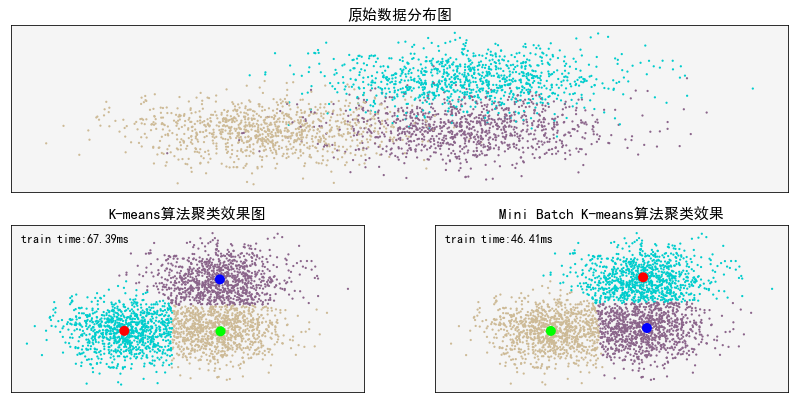

In [10]:
# 设置画布
plt.figure(figsize=(12, 6))
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.9)
# 设置颜色匹配
cm1 = mpl.colors.ListedColormap(['#00CDCD', '#CDBA96', '#8B658B'])
cm2 = mpl.colors.ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# 原始数据展示
plt.subplot(211)
plt.gca().set_facecolor('whitesmoke')
plt.scatter(X[:, 0], X[:, 1], c=y, s=5, cmap=cm1, edgecolors='None')
plt.title('原始数据分布图', fontsize=15)
# 消除坐标系
plt.xticks(())
plt.yticks(())

# K-means模型聚类效果
plt.subplot(223)
plt.gca().set_facecolor('whitesmoke')
plt.scatter(X[:, 0], X[:, 1], c=km_y_pre, s=5, cmap=cm1, edgecolors='None')
# 画出质心
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c=range(clusters), s=100, cmap=cm2, edgecolors='None')
plt.title('K-means算法聚类效果图', fontsize=15)
# 消除坐标系
plt.xticks(())
plt.yticks(())
# 添加文本说明
plt.text(-3.3, 2.5, 'train time:%.2fms' % (km_use_time*1000), fontsize=12)

# Mini Batch K-means模型聚类效果
plt.subplot(224)
plt.gca().set_facecolor('whitesmoke')
plt.scatter(X[:, 0], X[:, 1], c=mbk_y_pre, s=5, cmap=cm1, edgecolors='None')
# 画出质心
plt.scatter(mbk.cluster_centers_[:, 0], mbk.cluster_centers_[:, 1], c=range(clusters), s=100, cmap=cm2, edgecolors='None')
plt.title('Mini Batch K-means算法聚类效果', fontsize=15)
# 消除坐标系
plt.xticks(())
plt.yticks(())
# 添加文本说明
plt.text(-3.3, 2.5, 'train time:%.2fms' % (mbk_use_time*1000), fontsize=12)

plt.show()

# 5 聚类算法的衡量指标

## 5.1 衡量指标-常用指标

- **均一性：**一个簇中只包含一个类别的样本，则满足均一性；即每个簇中正确分类的样本数占**该簇总样本数**的比例和：$$p = \frac{1}{k}\sum_{i=1}^{k}\frac{N(C_{i}==K_{i})}{N(K_{i})}$$
- **完整性：**同类别样本被归类到相同的簇中，则满足完整性；每个簇中正确分类的样本数占**该类型总样本数**比例和：$$r = \frac{1}{k}\sum_{i=1}^{k}\frac{N(C_{i}==K_{i})}{N(C_{i})}$$
- **V-measure：**均一性和完整性的加权平均：$$V_{\beta } = \frac{(1+\beta ^{2})\cdot pr}{\beta ^{2}\cdot p+r}$$

## 5.2 衡量指标-ARI

- **Rand Index（兰德指数RI）：**RI取值范围$[0, 1]$，值越大意味着聚类结果与真实情况越吻合：$$RI = \frac{a+b}{C^{n_{samples}}_{2}}$$
    - 其中C表示实际类别信息，K表示聚类结果。
    - a表示**在C与K中都是同类别的元素对数**，b表示**在C与K中都是不同类别的元素对数**。
    - $C^{n_{samples}}_{2}$表示数据集中可以组成的对数。
- **Adjusted Rand Index（调整兰德指数ARI）：**ARI的取值范围$[-1, 1]$,值越大意味着聚类结果与真实情况越吻合，从广义的角度讲，ARI是衡量两个数据分布吻合程度的：$$ARI = \frac{RI-E[RI]}{max(RI)-E[RI]}$$

## 5.3 衡量指标-AMI

**Adjusted Mutual Information（调整互信息AME）**，类似于ARI，**内部使用信息熵**：

$S = \left \{ s_{1}, s_{2},\cdot \cdot \cdot s_{N} \right \}$，$U = \left \{ U_{1}, U_{2},\cdot \cdot \cdot U_{R} \right \}$，$V = \left \{ V_{1}, V_{2},\cdot \cdot \cdot, V_{C} \right \}$

$V = \left \{ V_{1}, V_{2},\cdot \cdot \cdot, V_{C} \right \}$，$\cup ^R_{i=1}U_{i} = \cup ^C_{j=1}V_{j} = S$，$n_{ij} = \left | U_{i} \cap V_{j} \right |$

$P(i) = \frac{\left | U_{i} \right |}{N}$，$P(j) = \frac{\left | V_{j} \right |}{N}$，$H(U) = -\sum_{i=1}^{R}P(i)logP(i)$，$H(V) = -\sum_{j=1}^{C}P(j)logP^{'}(i)$

$MI(U,V) = \sum_{i=1}^{R}\sum_{j=1}^{C}P(i,j)log\frac{P(i, j)}{P(i)P^{'}(j)}$，$P(i,j) = \frac{\left | U_{i}\cap V_{j} \right |}{N}$

$AMI(U,V) = \frac{MI(U,V)-E\left \{ MI(U,V) \right \}}{max\left \{ H(U),H(V) \right \}-E\left \{ MI(U,V) \right \}}$

## 5.4 衡量指标-轮廓系数

- **簇内不相似度：**计算样本$i$到同簇$C$其它样本的平均距离为$a_{i}$，**$a_{i}$越小**，表示**样本$i$越应该被聚类到该簇**，簇$C$中所有样本的**$a_{i}$的均值**被称为簇$C$的**簇不相似度**。
- **簇间不相似度：**计算样本$i$到其它簇$C_{j}$的所有样本的平均距离$b_{ij}$，$b_{i} = min\left \{ b_{i1}, b_{i2},\cdot \cdot \cdot ,b_{ik} \right \}$;$b_{i}$越大，表示样本$i$**越不属于其它簇**。
- **轮廓系数：**其公式为：$$S(i) = \frac{b(i)-a(i)}{max\left \{ a(i),b(i) \right \}}，s(i) = \begin{cases}
1-\frac{a(i)}{b(i)}, & \text{  } a(i)<b(i)  \\ 
0, & \text{ } a(i)=b(i) \\ 
\frac{b(i)}{a(i)}-1 & \text{  } a(i)>b(i)
\end{cases}$$
    - $s_{i}$越接近1，表示样本$i$聚类越合理。
    - $s_{i}$越接近-1，表示样本$i$越应该被分类到另外的簇中。
    - $s_{i}$近似为0，表示样本$i$应该在边界上。
    - **所有样本的$s_{i}$的均值被称为聚类结果的轮廓系数**

# 6 K-means和Mini Batch K-means算法效果评估

用make_blobs()函数创建聚类数据，然后对K-means算法和Mini Batch K-means算法构建的模型进行评估。

In [34]:
# 初始化3个中心点
centers = [[1, 1], [-1, -1], [1, -1]]
clusters = len(centers)
# 产生3000个聚类样本数据，2个特征，3个质心，簇内样本标准差同为0.7
X, y = make_blobs(n_samples=3000, n_features=2, centers=clusters, cluster_std=0.7, random_state=28)

# 构建KMeans模型
km = KMeans(n_clusters=clusters, init='k-means++', random_state=28)
# 开始训练时间
km_start_time = time.time()
# 训练模型
km.fit(X)
# 训练模型消耗时间
km_use_time = time.time() - km_start_time
print('K-means模型训练消耗时间：%.4fs' % km_use_time)
print('K-means模型的聚簇中心点：\n', km.cluster_centers_)

# 构建Mini Batch K-means模型
mbk = MiniBatchKMeans(n_clusters=clusters, init='k-means++', batch_size=100, random_state=28)
# 开始训练时间
mbk_start_time = time.time()
# 训练模型
mbk.fit(X)
# 模型训练消耗时间
mbk_use_time = time.time() - mbk_start_time
print('Mini Batch K-means模型训练消耗时间：%.4fs' % mbk_use_time)
print('Mini Batch K-means模型的聚簇中心点：\n', mbk.cluster_centers_)

# 对模型进行效果评估
score_funcs = [
        metrics.v_measure_score, # 均一性和完整性的加权平均
        metrics.adjusted_rand_score, # ARI，调整兰德指数
        metrics.adjusted_mutual_info_score, # AMI，调整互信息
        metrics.mutual_info_score # MI，互信息
]

# 对K-means模型和Mini Batch K-means模型分别迭代评估函数
for score_func in score_funcs:
    km_start_time = time.time()
    km_score = score_func(y, km.labels_)
    print('      K-means模型：%s评估函数计算结果为：%.5f，计算耗时：%.3fs' % (score_func.__name__, km_score, time.time()-km_start_time))
    
    mbk_start_time = time.time()
    mbk_score = score_func(y, mbk.labels_)
    print('MBK-means模型：%s评估函数计算结果为：%.5f，计算耗时：%.3fs' % (score_func.__name__, mbk_score, time.time()-mbk_start_time))

K-means模型训练消耗时间：0.0629s
K-means模型的聚簇中心点：
 [[ 4.4701783   1.282423  ]
 [-7.50404902 -2.09827447]
 [ 5.70680081  0.18657949]]
Mini Batch K-means模型训练消耗时间：0.0324s
Mini Batch K-means模型的聚簇中心点：
 [[ 5.75514182  0.20133441]
 [-7.53199316 -2.10028   ]
 [ 4.43171997  1.23635831]]
      K-means模型：v_measure_score评估函数计算结果为：0.74166，计算耗时：0.002s
MBK-means模型：v_measure_score评估函数计算结果为：0.73731，计算耗时：0.001s
      K-means模型：adjusted_rand_score评估函数计算结果为：0.74207，计算耗时：0.001s
MBK-means模型：adjusted_rand_score评估函数计算结果为：0.73650，计算耗时：0.001s
      K-means模型：adjusted_mutual_info_score评估函数计算结果为：0.74143，计算耗时：0.003s
MBK-means模型：adjusted_mutual_info_score评估函数计算结果为：0.73714，计算耗时：0.003s
      K-means模型：mutual_info_score评估函数计算结果为：0.81472，计算耗时：0.001s
MBK-means模型：mutual_info_score评估函数计算结果为：0.81000，计算耗时：0.001s
